In [10]:
cd drive/My\ Drive/Fastai

/content/drive/My Drive/Fastai


#### Installing Fastbook

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
!pip install -Uqq fastbook

In [1]:
# CLICK ME
from fastbook import *

/home/ashwani/anaconda3/lib/python3.7/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/home/ashwani/.fastai/data/mnist_sample')

# **My Fastai Journey**

I decided to do the famous Fast.ai course offered by Jeremy Howard and his team at USF. It already seems interesting, so I decided to write about it starting from the very first chapter.





## Chapter 1 - Introduction

#### Key Learnings

1.   History of AI

2.   Universal Approximaton Theorem: Neural Networks are flexible functions used to approximate any function. UAT proves that a single-layer perceptron(at the least, with variable number of neurons in the first layer) can be used to approximate any function.

3. Limitations of ML: a lot of data(labelled) needed, model can only learn the patterns available in the data, We only get **predictions, not actions**.

4. Model and the environment: interactions


> Example of policing model and its possible bias to black neighbourhoods because of more historical arrest data from black neighborhoods. This data leading to further bias and creating a **positive feedback loop**. 



5.   Concept of Machine learning:


> general problem solving in CS vs ML:





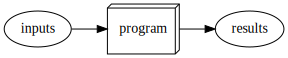

In [ ]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

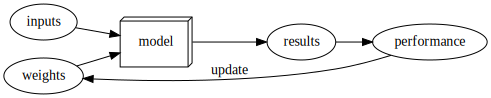

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

This trained model can be then used as a traditional brute force program. We just need the correct set of parameters for a specific job


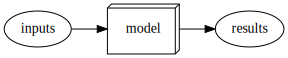

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

# **First Models**

The interesting part here is that they start by training a deep CNN transfer learning model out of nowher in 8 lines of code shown below. Too easy to be true!!

Yes, it is too easy. Previously when I used Fastai to train on a dataset of satellite images, the major challenge I faced was to initialise a Dataloader to load my dataset, and turns out that Fastai doesn't support the concept of test dataset. It's complicated. I hope jeremy gets into it soon and I really hope they found an easier way to check model's performance on test dataset, rather than converting the test dataset as validation set.

So yes, For me, loading he dataset is something which takes up a few lines of code and apparently we didn't do that here.

### **1. Image Classification**

In [9]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.165717,0.026012,0.005413,01:32


epoch,train_loss,valid_loss,error_rate,time
0,0.057231,0.020137,0.005413,02:10


Okay. So it trains quite quick. But I don't understand where is the input image size specified. So I checked the sizes of different images from the folder in **path** used for training and find that they are of different sizes. I try to test a few random mages from a google search and we get accurate predictions with a probability of 1. So we need to have a closer look at what CNNLearner does. Perhaps it does the resizing of images. 

In [10]:
# Testing- a random image from google
import os
os.listdir(path)
#'american_bulldog_197.jpg','boxer_156.jpg','basset_hound_30.jpg','keeshond_168.jpg','german_shorthaired_163.jpg',
 #'basset_hound_24.jpg','miniature_pinscher_4.jpg','Sphynx_41.jpg','Abyssinian_69.jpg
#img = PILImage.create(os.path.join(path,'Sphynx_41.jpg'))

img = PILImage.create('image/cat1.jpeg')
is_cat,_,probs = learn.predict(img)

print(is_cat,_,probs)

True tensor(1) tensor([1.5151e-17, 1.0000e+00])


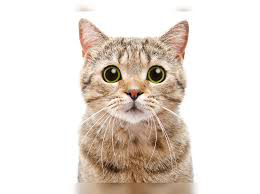

In [ ]:
img.shape
img.to_thumb(500)

### **2. Semantic Segmentation**

In [6]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,2.524499,2.173175,00:01


epoch,train_loss,valid_loss,time
0,1.710621,1.377497,00:01
1,1.511200,1.149514,00:01
2,1.447674,1.049558,00:01
3,1.327681,0.921041,00:01
4,1.208104,0.808313,00:01
5,1.101719,0.727780,00:01
6,1.008277,0.663943,00:01
7,0.935519,0.664530,00:01


If you are also wondering what "**label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}'**" means, then don't worry about it. I checked the **URLs.CAMVID_TINY** dataset. There are two folders, images and labels. Both contain png files and the label name is similar to image name with a '_P' at the end. So o.stem gives the filename for the image and o,suffix gives the extension (.png in this case)  

In [11]:
img = PILImage.create('image/unet1.jpg')
img

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
_a,_,probs = learn.predict(img)
print(_a,_,probs)

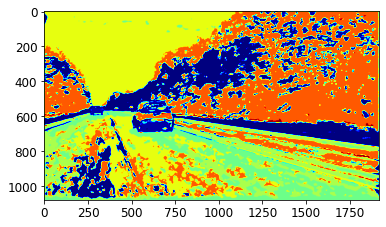

In [25]:
import matplotlib.pyplot as plt
plt.imshow(_, cmap='jet')

unet_learner().predict(img) gives 3 things: 
1. tensor giving the predication code at each pixelfor that test example/True or False for that test example in case of binary classification(e.g. True if it is a cat)
2. tensor result of the same. i.e. tensor(1) in case of cat/dog classification and tensor(
  
        [[21, 21, 21,  ..., 26,  4,  4],
        [21, 21, 21,  ..., 26, 26,  4],
        [21, 21, 21,  ..., 26, 26,  4],
        ...,
        [17, 19, 19,  ..., 19, 17, 17],
        [17, 17, 17,  ..., 17, 17, 17],
        [17, 17, 17,  ..., 17, 17, 17]])

  in case of unet_learner.

3. probability of each class,i.e tensor([1.5151e-17, 1.0000e+00] for dog-cat classification and a (img.shape[0], img.shape[1], 32) tensor for unet learner. 32 for the number of classes which we identify.


**Doubt**: How to use show_results to show the output for one external image. don't want to use batches.

# **Important Functions**: 
doc(class name)

In [16]:
doc(show_results)